In [1]:
'''
author: Felix Hol
date: 2019 June 11
Align bodypart coordinates, translation to put a specific bodypart at origin, rotation along body axis
'''

# import deeplabcut
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import tables
import glob
from sklearn.decomposition import PCA
import pickle

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# plt.style.use('seaborn-dark-palette')

In [ ]:
fileList = glob.glob('/Users/felix/moreTest01-felix-2019-05-07/analyzeVideos/*DeepCut_resnet50_moreTest01May6shuffle1_65700.h5')
alignTo = 'bottom'

dfRelRotAll = pd.DataFrame()

for i in fileList:
    dataFile = i
    df = pd.read_hdf(dataFile)
    df.columns = df.columns.droplevel()
    dfRel = df.copy()
    for i in dfRel.columns.levels[0]:
        dfRel[i, 'x'] = dfRel[i, 'x'] - df[alignTo, 'x']
        dfRel[i, 'y'] = dfRel[i, 'y'] - df[alignTo, 'y']
    dfRelRot = dfRel.copy()
    for index, row in dfRelRot.iterrows():
        bodyAngle = getBodyAngle(dfRel, index)
        for i in dfRelRot.columns.levels[0]:
            dfRelRot[i, 'x'][index] = (dfRel[i, 'x'][index] * math.cos(bodyAngle)) - (dfRel[i, 'y'][index] * math.sin(bodyAngle))
            dfRelRot[i, 'y'][index] = (dfRel[i, 'x'][index] * math.sin(bodyAngle)) + (dfRel[i, 'y'][index] * math.cos(bodyAngle))
    dfRelRotAll = dfRelRotAll.append(dfRelRot, ignore_index=False)


In [ ]:
dfRelRot.head()

In [ ]:
len(dfRelRot)

In [ ]:
dfRelRotAll.head()

In [ ]:
len(dfRelRotAll)

In [3]:
tp13 = pickle.load(open('/Users/felix/Documents/mosquitoes/mosquitoData/bloodTasteData/trackAndBodypart/190702_SalineNoATP_M3/190702_SalineNoATP_M3_p13_tStats.pkl', 'rb'))

In [4]:
tp13.head()

,y,x,frame,particle,species,age,distance,velocity,bellyWidth,bellyArea,mosqLength
161,953.344484,1805.033304,2108,13,aeg,10,5.386306,53.863061,0.319321,91.0,0.354801
162,828.864385,1630.109225,2109,13,aeg,10,8.899490,88.994904,0.730614,1067.5,1.280313
163,791.945509,1277.308019,2110,13,aeg,10,3.342157,33.421570,0.971834,1367.0,1.227394
164,693.269425,1187.811869,2111,13,aeg,10,0.211122,2.111216,0.746077,2758.0,4.065400
165,701.503434,1189.548563,2112,13,aeg,10,0.627323,6.273233,0.765862,3176.5,4.595173


In [8]:
dataFile = '/Users/felix/Documents/mosquitoes/mosquitoData/bloodTasteData/trackAndBodypart/190702_SalineNoATP_M3/crops_p13/crops_p13DeepCut_resnet50_moreTest01Jul23shuffle1_244500.h5'
df = pd.read_hdf(dataFile)
df.columns = df.columns.droplevel()
# df['','frame'] = ''

In [6]:
for i in df.index:
    df.loc[i, ('','frame')] = int(i[i.find('_f') + 2 : i.find('.png')])
    

In [9]:
alignTo = 'bottom'
dfRel = df.copy()

for i in dfRel.columns.levels[0]:
    dfRel[i, 'x'] = dfRel[i, 'x'] - df[alignTo, 'x']
    dfRel[i, 'y'] = dfRel[i, 'y'] - df[alignTo, 'y']

In [10]:
dfRel.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p013_f002108.png   228.416254  182.203086   0.001932      52.302638   
crop_p013_f002109.png    94.029468 -185.490872   0.999998     -51.704728   
crop_p013_f002110.png   158.451062  -18.100609   0.995329     159.537103   
crop_p013_f002111.png  -298.142760 -134.063279   0.993113     121.504408   
crop_p013_f002112.png  -292.621609 -138.449084   0.997729     126.190354   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p013_f002108.png  196.113345   0.013054   103.326110  177.183855   
crop_p013_f002109.png   99.842078   0.007158   -55.324303  101.273195   
crop_p013_f002110.png  -18.273641   0.008466   171.560366  137.777785   
crop_p013_f002111.png -214.687251   0.821885   -26.269289  177.704870   
crop_p013_f002112.png -216.159613   0.321936    -0.024677  154.045880   

bodyparts                        leftForeleg  ...  proboscis       head  \
coords                likelihood           x  ... likelihood          x   
crop_p013_f002108.png   0.987742  229.618367  ...   0.016475  16.477765   
crop_p013_f002109.png   0.815549  -53.137149  ...   0.003395  83.371887   
crop_p013_f002110.png   0.999572  -81.768596  ...   0.862726   9.767886   
crop_p013_f002111.png   0.717738  -11.538371  ...   1.000000 -92.243366   
crop_p013_f002112.png   0.999988   -7.703135  ...   1.000000 -89.587872   

bodyparts                                       abdomen                        \
coords                          y likelihood          x          y likelihood   
crop_p013_f002108.png -142.246227   0.999969   6.457062 -53.719651   0.197972   
crop_p013_f002109.png  -63.598283   1.000000  35.238014 -16.924947   0.819813   
crop_p013_f002110.png   -4.500940   0.999999 -80.459492  57.525690   0.003509   
crop_p013_f002111.png -154.863008   1.000000 -45.519308 -63.042662   0.999992   
crop_p013_f002112.png -151.863945   1.000000 -44.342941 -59.876079   0.999997   

bodyparts             bottom                  
coords                     x    y likelihood  
crop_p013_f002108.png    0.0  0.0   0.229010  
crop_p013_f002109.png    0.0  0.0   0.011711  
crop_p013_f002110.png    0.0  0.0   0.016966  
crop_p013_f002111.png    0.0  0.0   1.000000  
crop_p013_f002112.png    0.0  0.0   1.000000  

[5 rows x 30 columns]

In [11]:
def getBodyAngle(dfRel, i):
    if dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / dfRel[[('head','x')]].loc[i].values)
        bodyAngle = -1 * bodyAngleRaw
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi - bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi + bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1* (2 * math.pi - bodyAngleRaw)
    return bodyAngle


In [42]:
dfRelRot = dfRel.copy()
dfRelRot['','angle'] = ''

for index, row in dfRelRot.iterrows():
#     print(index)
    bodyAngle = getBodyAngle(dfRel, index)
#     dfRelRot.loc[index,('bodyparts','angle')] = bodyAngle
    dfRelRot['', 'angle'][index] = bodyAngle
#     print(bodyAngle)
    for i in dfRelRot.columns.levels[0][0:10]:
#         print(i)
#         print(dfRel[i, 'x'][index])
        dfRelRot[i, 'x'][index] = (dfRel[i, 'x'][index] * math.cos(bodyAngle)) - (dfRel[i, 'y'][index] * math.sin(bodyAngle))
        dfRelRot[i, 'y'][index] = (dfRel[i, 'x'][index] * math.sin(bodyAngle)) + (dfRel[i, 'y'][index] * math.cos(bodyAngle))
#         print(bodyAngle)
#         print(dfRel[i, 'x'][index])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
len(dfRelRot.columns.levels[0])

12

In [35]:
dfRelRot.columns.levels[0][0:11]

Index(['abdomen', 'bottom', 'head', 'leftForeleg', 'leftHindLeg',
       'leftMiddleLeg', 'proboscis', 'rightForeleg', 'rightHindLeg',
       'rightMiddleLeg', ''],
      dtype='object', name='bodyparts')

In [43]:
dfRelRot.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p013_f002108.png  -154.708860  247.865121   0.001932    -188.792156   
crop_p013_f002109.png   187.262263  -90.450259   0.999998    -101.664205   
crop_p013_f002110.png   151.483166   49.872051   0.995329     152.541942   
crop_p013_f002111.png   267.751171 -187.540339   0.993113     122.267339   
crop_p013_f002112.png   267.926755 -181.688768   0.997729     122.060800   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p013_f002108.png   74.522022   0.013054  -164.117124  123.028342   
crop_p013_f002109.png   48.023002   0.007158  -105.410033   46.965556   
crop_p013_f002110.png   50.169405   0.008466    98.154577  196.929826   
crop_p013_f002111.png  214.253669   0.821885  -139.230127 -113.508009   
crop_p013_f002112.png  218.518065   0.321936  -132.666976  -78.291809   

bodyparts                        leftForeleg  ...        head                \
coords                likelihood           x  ...           x             y   
crop_p013_f002108.png   0.987742 -155.798786  ...  143.197437  4.263256e-14   
crop_p013_f002109.png   0.815549 -103.485801  ...  104.859969  2.842171e-14   
crop_p013_f002110.png   0.999572 -104.905540  ...   10.755001 -8.881784e-16   
crop_p013_f002111.png   0.717738  285.106110  ...  180.253681 -5.684342e-14   
crop_p013_f002112.png   0.999988  282.904782  ...  176.319723  1.421085e-14   

bodyparts                           abdomen                       bottom       \
coords                likelihood          x          y likelihood      x    y   
crop_p013_f002108.png   0.999969  54.105826   0.232636   0.197972    0.0  0.0   
crop_p013_f002109.png   1.000000  38.282076   7.915436   0.819813    0.0  0.0   
crop_p013_f002110.png   0.999999 -97.149109  18.573784   0.003509    0.0  0.0   
crop_p013_f002111.png   1.000000  77.456562  -6.845850   0.999992   -0.0  0.0   
crop_p013_f002112.png   1.000000  74.101792  -7.769542   0.999997   -0.0  0.0   

bodyparts                                  
coords                likelihood    angle  
crop_p013_f002108.png   0.229010 -4.82771  
crop_p013_f002109.png   0.011711 -5.63153  
crop_p013_f002110.png   0.016966  -5.8514  
crop_p013_f002111.png   1.000000 -4.17518  
crop_p013_f002112.png   1.000000 -4.17941  

[5 rows x 31 columns]

In [14]:
bodyAngle

-2.02648782051745

In [15]:
row

bodyparts       coords    
rightForeleg    x             2.256637e+02
                y            -1.035933e+02
                likelihood    9.997329e-01
rightMiddleLeg  x             1.878261e+02
                y            -2.263335e+02
                likelihood    2.487805e-01
rightHindLeg    x            -1.103951e+02
                y            -1.574391e+02
                likelihood    9.999990e-01
leftForeleg     x             2.971229e+02
                y             1.401685e+02
                likelihood    9.996300e-01
leftMiddleLeg   x             5.091600e+01
                y             1.716776e+02
                likelihood    9.999837e-01
leftHindLeg     x            -9.294052e+01
                y             9.209365e+01
                likelihood    2.308714e-01
proboscis       x             2.487467e+02
                y            -1.031212e+01
                likelihood    1.000000e+00
head            x             1.771437e+02
                y          

In [15]:
dfRelRot['','frame'] = ''

for i in dfRelRot.index:
    dfRelRot.loc[i, ('','frame')] = int(i[i.find('_f') + 2 : i.find('.png')])

In [18]:
dfd = dfRelRot.copy()
dfd.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in dfd.columns]
dfd = dfd.rename(columns={"_frame": "frame"})

In [19]:
dfd.head()

,rightForeleg_x,rightForeleg_y,rightForeleg_likelihood,rightMiddleLeg_x,rightMiddleLeg_y,rightMiddleLeg_likelihood,rightHindLeg_x,rightHindLeg_y,rightHindLeg_likelihood,leftForeleg_x,...,head_x,head_y,head_likelihood,abdomen_x,abdomen_y,abdomen_likelihood,bottom_x,bottom_y,bottom_likelihood,frame
crop_p013_f002108.png,-154.708860,247.865121,0.001932,-188.792156,74.522022,0.013054,-164.117124,123.028342,0.987742,-155.798786,...,143.197437,4.263256e-14,0.999969,54.105826,0.232636,0.197972,0.0,0.0,0.229010,2108
crop_p013_f002109.png,187.262263,-90.450259,0.999998,-101.664205,48.023002,0.007158,-105.410033,46.965556,0.815549,-103.485801,...,104.859969,2.842171e-14,1.000000,38.282076,7.915436,0.819813,0.0,0.0,0.011711,2109
crop_p013_f002110.png,151.483166,49.872051,0.995329,152.541942,50.169405,0.008466,98.154577,196.929826,0.999572,-104.905540,...,10.755001,-8.881784e-16,0.999999,-97.149109,18.573784,0.003509,0.0,0.0,0.016966,2110
crop_p013_f002111.png,267.751171,-187.540339,0.993113,122.267339,214.253669,0.821885,-139.230127,-113.508009,0.717738,285.106110,...,180.253681,-5.684342e-14,1.000000,77.456562,-6.845850,0.999992,-0.0,0.0,1.000000,2111
crop_p013_f002112.png,267.926755,-181.688768,0.997729,122.060800,218.518065,0.321936,-132.666976,-78.291809,0.999988,282.904782,...,176.319723,1.421085e-14,1.000000,74.101792,-7.769542,0.999997,-0.0,0.0,1.000000,2112


In [20]:
# dfd = df.copy()
# dfd.columns = dfd.columns.droplevel()
mdf = pd.merge(dfd, tp13, on='frame', how='inner')

In [ ]:
dfRelRotAll.to_csv('DLC_test01.csv')

In [ ]:
plt.figure()
df.plot(legend=False)

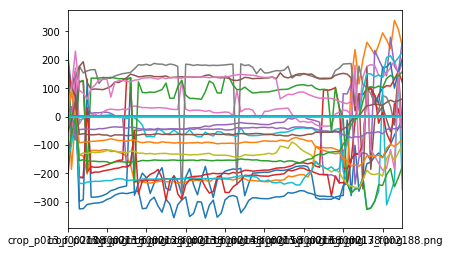

In [21]:
plt.figure()
dfRel.plot(legend=False)

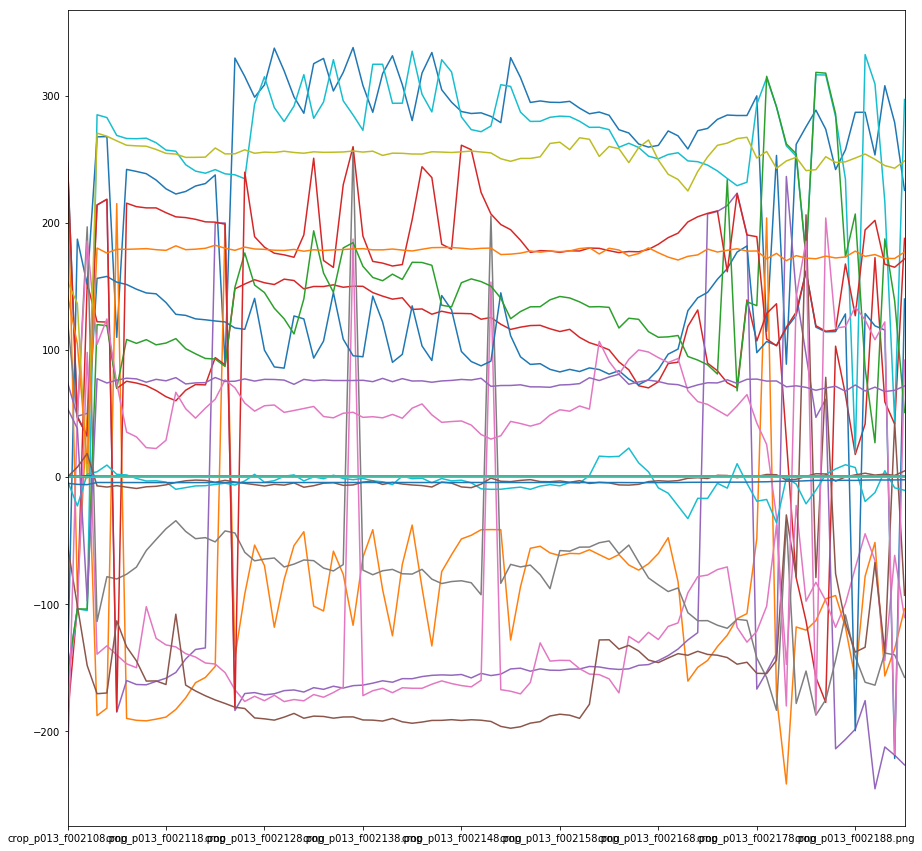

In [46]:
# ax = plt.figure()
ax = dfRelRot.plot(legend=False,figsize=(15,15))
ax.grid(False)
# plt.xlim([190, 380])

In [49]:
dfRelRot.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p013_f002108.png  -154.708860  247.865121   0.001932    -188.792156   
crop_p013_f002109.png   187.262263  -90.450259   0.999998    -101.664205   
crop_p013_f002110.png   151.483166   49.872051   0.995329     152.541942   
crop_p013_f002111.png   267.751171 -187.540339   0.993113     122.267339   
crop_p013_f002112.png   267.926755 -181.688768   0.997729     122.060800   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p013_f002108.png   74.522022   0.013054  -164.117124  123.028342   
crop_p013_f002109.png   48.023002   0.007158  -105.410033   46.965556   
crop_p013_f002110.png   50.169405   0.008466    98.154577  196.929826   
crop_p013_f002111.png  214.253669   0.821885  -139.230127 -113.508009   
crop_p013_f002112.png  218.518065   0.321936  -132.666976  -78.291809   

bodyparts                        leftForeleg  ...        head                \
coords                likelihood           x  ...           x             y   
crop_p013_f002108.png   0.987742 -155.798786  ...  143.197437  4.263256e-14   
crop_p013_f002109.png   0.815549 -103.485801  ...  104.859969  2.842171e-14   
crop_p013_f002110.png   0.999572 -104.905540  ...   10.755001 -8.881784e-16   
crop_p013_f002111.png   0.717738  285.106110  ...  180.253681 -5.684342e-14   
crop_p013_f002112.png   0.999988  282.904782  ...  176.319723  1.421085e-14   

bodyparts                           abdomen                       bottom       \
coords                likelihood          x          y likelihood      x    y   
crop_p013_f002108.png   0.999969  54.105826   0.232636   0.197972    0.0  0.0   
crop_p013_f002109.png   1.000000  38.282076   7.915436   0.819813    0.0  0.0   
crop_p013_f002110.png   0.999999 -97.149109  18.573784   0.003509    0.0  0.0   
crop_p013_f002111.png   1.000000  77.456562  -6.845850   0.999992   -0.0  0.0   
crop_p013_f002112.png   1.000000  74.101792  -7.769542   0.999997   -0.0  0.0   

bodyparts                                  
coords                likelihood    angle  
crop_p013_f002108.png   0.229010 -4.82771  
crop_p013_f002109.png   0.011711 -5.63153  
crop_p013_f002110.png   0.016966  -5.8514  
crop_p013_f002111.png   1.000000 -4.17518  
crop_p013_f002112.png   1.000000 -4.17941  

[5 rows x 31 columns]

In [50]:
plt.plot(dfRelRot[[('head','x')]].loc[0], dfRelRot[[('head','y')]].loc[0],'.r')

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [51]:
plt.plot(df[[('head','x')]].loc[0], df[[('head','y')]].loc[0],'.r')
plt.plot(df[[('abdomen','x')]].loc[0], df[[('abdomen','y')]].loc[0],'.g')
plt.plot(df[[('bottom','x')]].loc[0], df[[('bottom','y')]].loc[0],'.k')
plt.plot(df[[('rightForeleg','x')]].loc[0], df[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(df[[('leftForeleg','x')]].loc[0], df[[('leftForeleg','y')]].loc[0],'.m')

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [ ]:
plt.plot(dfRel[[('head','x')]].loc[0], dfRel[[('head','y')]].loc[0],'.r')
plt.plot(dfRel[[('abdomen','x')]].loc[0], dfRel[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRel[[('bottom','x')]].loc[0], dfRel[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRel[[('rightForeleg','x')]].loc[0], dfRel[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRel[[('leftForeleg','x')]].loc[0], dfRel[[('leftForeleg','y')]].loc[0],'.m')

In [ ]:
plt.plot(dfRelRot[[('head','x')]].loc[0], dfRelRot[[('head','y')]].loc[0],'.r')
plt.plot(dfRelRot[[('abdomen','x')]].loc[0], dfRelRot[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRelRot[[('bottom','x')]].loc[0], dfRelRot[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[0], dfRelRot[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[0], dfRelRot[[('leftForeleg','y')]].loc[0],'.m')

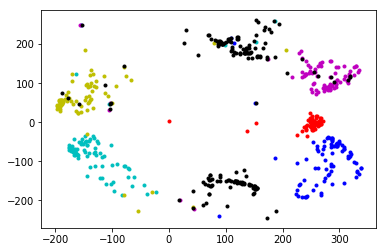

In [52]:
plt.plot(dfRelRot[[('head','x')]].loc[:], dfRelRot[[('head','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('abdomen','x')]].loc[:], dfRelRot[[('abdomen','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('bottom','x')]].loc[:], dfRelRot[[('bottom','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[:], dfRelRot[[('rightForeleg','y')]].loc[:],'.b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[:], dfRelRot[[('leftForeleg','y')]].loc[:],'.m')
plt.plot(dfRelRot[[('rightHindLeg','x')]].loc[:], dfRelRot[[('rightHindLeg','y')]].loc[:],'.c')
plt.plot(dfRelRot[[('leftHindLeg','x')]].loc[:], dfRelRot[[('leftHindLeg','y')]].loc[:],'.y')
plt.plot(dfRelRot[[('rightMiddleLeg','x')]].loc[:], dfRelRot[[('rightMiddleLeg','y')]].loc[:],'.k')
plt.plot(dfRelRot[[('leftMiddleLeg','x')]].loc[:], dfRelRot[[('leftMiddleLeg','y')]].loc[:],'.k')
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'.r')

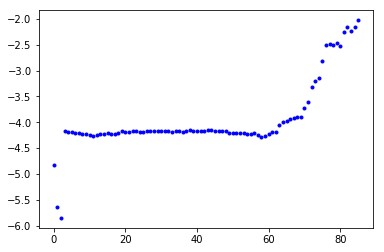

In [56]:
plt.plot(dfRelRot[[('','angle')]].loc[:].values,'.b')



In [ ]:
plt.plot(dfRelRot[[('head','x')]].loc[:], dfRelRot[[('head','y')]].loc[:],'w')
# plt.plot(dfRelRot[[('abdomen','x')]].loc[:], dfRelRot[[('abdomen','y')]].loc[:],'w')
# plt.plot(dfRelRot[[('bottom','x')]].loc[:], dfRelRot[[('bottom','y')]].loc[:],'w')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[:], dfRelRot[[('rightForeleg','y')]].loc[:],'b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[:], dfRelRot[[('leftForeleg','y')]].loc[:],'m')
# plt.plot(dfRelRot[[('rightHindLeg','x')]].loc[:], dfRelRot[[('rightHindLeg','y')]].loc[:],'c')
# plt.plot(dfRelRot[[('leftHindLeg','x')]].loc[:], dfRelRot[[('leftHindLeg','y')]].loc[:],'y')
# plt.plot(dfRelRot[[('rightMiddleLeg','x')]].loc[:], dfRelRot[[('rightMiddleLeg','y')]].loc[:],'k')
# plt.plot(dfRelRot[[('leftMiddleLeg','x')]].loc[:], dfRelRot[[('leftMiddleLeg','y')]].loc[:],'g')
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'r')

In [ ]:
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'r')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df[[('rightMiddleLeg','x')]], 'c')
plt.plot(df[[('leftMiddleLeg','x')]], 'm')
plt.plot(df[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(df[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(df[[('proboscis','x')]], 'k')
plt.plot(df[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(df[[('abdomen','x')]], 'y')
plt.plot(df[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(dfRel[[('rightMiddleLeg','x')]], 'c')
plt.plot(dfRel[[('leftMiddleLeg','x')]], 'm')
plt.plot(dfRel[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(dfRel[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(dfRel[[('proboscis','x')]], 'k')
plt.plot(dfRel[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(dfRel[[('abdomen','x')]], 'y')
plt.plot(dfRel[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
plt.figure(figsize=(15,11))
plt.plot(dfRelRot[[('rightMiddleLeg','x')]], 'y')
# plt.plot(dfRelRot[[('leftMiddleLeg','x')]], 'm')
# plt.plot(dfRelRot[[('rightHindLeg','x')]], 'm')
plt.plot(dfRelRot[[('rightHindLeg','y')]], 'm')
plt.plot(dfRelRot[[('rightForeleg','x')]], 'c')#, alpha=0.25)
# plt.plot(dfRelRot[[('rightForeleg','y')]], '--m')#, alpha=0.25)
# plt.plot(dfRelRot[[('proboscis','x')]], 'k')
plt.plot(dfRelRot[[('proboscis','y')]], 'k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
# plt.plot(dfRelRot[[('abdomen','x')]], 'y')
# plt.plot(dfRelRot[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'right hind leg, y', 'right foreleg, x', 'proboscis, y'])#, 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
dfRelRot.head()

In [ ]:
print(len(dfRelRot))
print(len(dfRelRotAll))

In [26]:
# dfxy  = dfRelRot.drop(columns=['likelihood'], level=1)
dfxy = dfRelRot.copy()

In [27]:
dfxy.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p013_f002108.png  -154.708860  247.865121   0.001932    -188.792156   
crop_p013_f002109.png   187.262263  -90.450259   0.999998    -101.664205   
crop_p013_f002110.png   151.483166   49.872051   0.995329     152.541942   
crop_p013_f002111.png   267.751171 -187.540339   0.993113     122.267339   
crop_p013_f002112.png   267.926755 -181.688768   0.997729     122.060800   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p013_f002108.png   74.522022   0.013054  -164.117124  123.028342   
crop_p013_f002109.png   48.023002   0.007158  -105.410033   46.965556   
crop_p013_f002110.png   50.169405   0.008466    98.154577  196.929826   
crop_p013_f002111.png  214.253669   0.821885  -139.230127 -113.508009   
crop_p013_f002112.png  218.518065   0.321936  -132.666976  -78.291809   

bodyparts                        leftForeleg  ...        head                \
coords                likelihood           x  ...           x             y   
crop_p013_f002108.png   0.987742 -155.798786  ...  143.197437  4.263256e-14   
crop_p013_f002109.png   0.815549 -103.485801  ...  104.859969  2.842171e-14   
crop_p013_f002110.png   0.999572 -104.905540  ...   10.755001 -8.881784e-16   
crop_p013_f002111.png   0.717738  285.106110  ...  180.253681 -5.684342e-14   
crop_p013_f002112.png   0.999988  282.904782  ...  176.319723  1.421085e-14   

bodyparts                           abdomen                       bottom       \
coords                likelihood          x          y likelihood      x    y   
crop_p013_f002108.png   0.999969  54.105826   0.232636   0.197972    0.0  0.0   
crop_p013_f002109.png   1.000000  38.282076   7.915436   0.819813    0.0  0.0   
crop_p013_f002110.png   0.999999 -97.149109  18.573784   0.003509    0.0  0.0   
crop_p013_f002111.png   1.000000  77.456562  -6.845850   0.999992   -0.0  0.0   
crop_p013_f002112.png   1.000000  74.101792  -7.769542   0.999997   -0.0  0.0   

bodyparts                               
coords                likelihood frame  
crop_p013_f002108.png   0.229010  2108  
crop_p013_f002109.png   0.011711  2109  
crop_p013_f002110.png   0.016966  2110  
crop_p013_f002111.png   1.000000  2111  
crop_p013_f002112.png   1.000000  2112  

[5 rows x 31 columns]

In [28]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfxy)
pcaDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [29]:
pcaDf.head()

,pca1,pca2
0,657.201349,479.771964
1,418.704686,260.660840
2,414.403826,436.074311
3,186.536656,-239.023139
4,194.698936,-226.234536


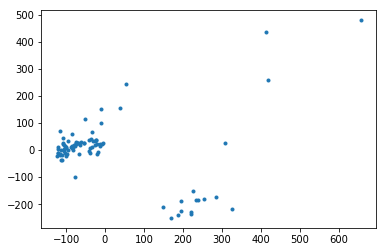

In [30]:
plt.plot(pcaDf.pca1, pcaDf.pca2,'.')

In [ ]:
dfxyall  = dfRelRotAll.drop(columns=['likelihood'], level=1)
pca = PCA(n_components=2)
principalComponentsAll = pca.fit_transform(dfxyall)
pcaDfAll = pd.DataFrame(data = principalComponentsAll, columns = ['pca1', 'pca2'])

In [ ]:
plt.plot(pcaDfAll.pca1, pcaDfAll.pca2,'.')

In [ ]:
dfxyT = dfxy.copy()
dfxyT.columns = dfxyT.columns.droplevel()
dfxyT['label'] = ''

In [ ]:
dfxyT.loc[0:95, 'label'] = 1
dfxyT.loc[95:135, 'label'] = 2
dfxyT.loc[135:220, 'label'] = 3
dfxyT.loc[220:, 'label'] = 2

In [ ]:
y = dfxyT.loc[:,['label']].values

In [ ]:
finalDf = pd.concat([pcaDf, dfxyT[['label']]], axis = 1)

In [ ]:
finalDf.head()

In [ ]:
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['m', 'k', 'c', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , c = color
               , alpha = 0.65
               , s = 50)
ax.legend(['hind leg groom', 'rest', 'proboscis groom'], fontsize=20)
ax.grid(c='lightgray')
ax.set_axis_bgcolor('white')
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18)

In [ ]:
dfxy.head()

In [ ]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

n_neighbors = 15

X = dfxy.copy()
X.columns = dfxy.columns.droplevel()
y = dfxyT['label']

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = dfxy.copy()
X.columns = dfxy.columns.droplevel()
y = dfxyT['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

In [ ]:
y_predict = knn_model.predict(X_test)
y_predict

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'palegreen', 3: 'black', 4: 'blue'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8)
#                 label='Species {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

In [ ]:
label

In [ ]:
colors

In [ ]:
dfp = pandas.read_pickle('181206_01_2712-2973DeepCut_resnet50_moreTest01May6shuffle1_65700includingmetadata.pickle')

In [ ]:
dfp.head()

In [ ]:
dfp

In [ ]:
fileList = glob.glob('/Users/felix/moreTest01-felix-2019-05-07/analyzeVideos/*DeepCut_resnet50_moreTest01May6shuffle1_65700.h5')

In [ ]:
fileList